<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [2]:
# importing the needed libraries
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
# load the csv file
# store the data in 'df_reimb'
df = pd.read_csv('Likes.csv')

# display first five observations using head()
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

>### 1.  PART 1



In [71]:
df.dtypes

userid                    int64
age                       int64
dob_day                   int64
dob_year                  int64
dob_month                 int64
gender                   object
tenure                    int64
friend_count              int64
friendships_initiated     int64
likes                     int64
likes_received            int64
mobile_likes              int64
mobile_likes_received     int64
www_likes                 int64
www_likes_received        int64
dtype: object

In [152]:
df1 = df.sample(n=8,axis='columns',random_state=1)
df1.head()

,dob_year,friend_count,tenure,dob_day,likes_received,dob_month,age,www_likes
0,2000,0,0,2,0,2,13,1
1,1999,0,104,22,0,1,14,1
2,1994,0,212,18,0,10,19,1
3,1992,0,328,1,0,1,21,1
4,1990,0,580,10,0,2,23,1


In [153]:
df1.columns

Index(['dob_year', 'friend_count', 'tenure', 'dob_day', 'likes_received',
       'dob_month', 'age', 'www_likes'],
      dtype='object')

In [154]:
# THE COLUMNS RANDOMLY SELCTED ARE 'dob_year', 'friend_count', 'tenure', 'dob_day', 'likes_received','dob_month', 'age', 'www_likes']

In [155]:
df1.isnull().sum()

dob_year          0
friend_count      0
tenure            0
dob_day           0
likes_received    0
dob_month         0
age               0
www_likes         0
dtype: int64

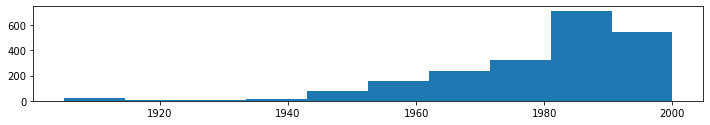

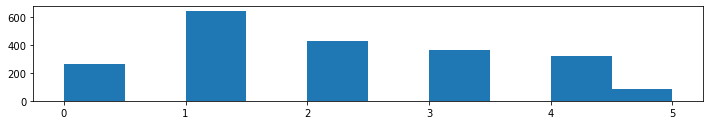

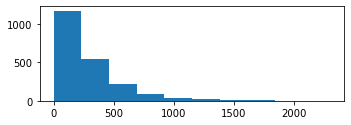

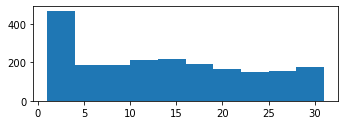

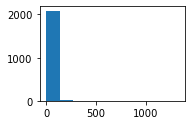

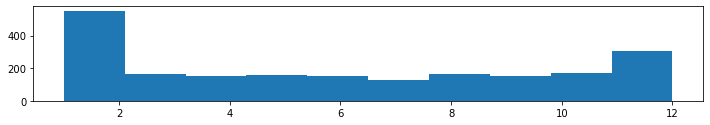

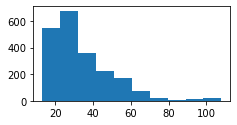

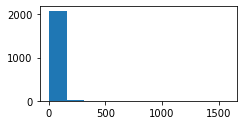

In [157]:

plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.hist(df1['dob_year'])
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(4,1,2)
plt.hist(df1['friend_count'])
plt.show()


plt.figure(figsize=(12,8))
plt.subplot(4,2,1)
plt.hist(df1['tenure'])
plt.show()


plt.figure(figsize=(12,8))
plt.subplot(4,2,2)
plt.hist(df1['dob_day'])
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(4,4,2)
plt.hist(df1['likes_received'])
plt.show()



plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.hist(df1['dob_month'])
plt.show()


plt.figure(figsize=(12,8))
plt.subplot(4,3,1)
plt.hist(df1['age'])
plt.show()


plt.figure(figsize=(12,8))
plt.subplot(4,3,2)
plt.hist(df1['www_likes'])
plt.show()





#### INFERENCES : ONLT THE FRIEND COUNT COLUMN EXHIBITS A NORMAL DISTRIBUION ALL OTHER COLUMNS DOES NOT SHOW A NORMAL DISTRIBUTION

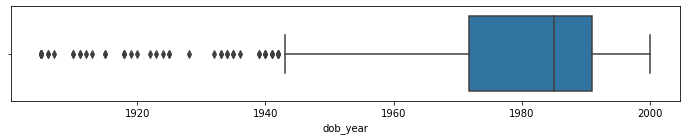

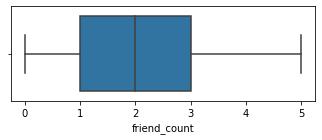

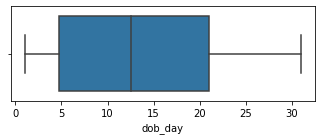

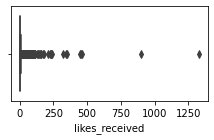

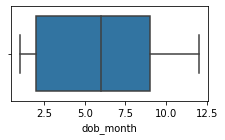

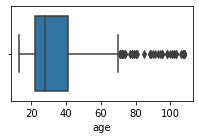

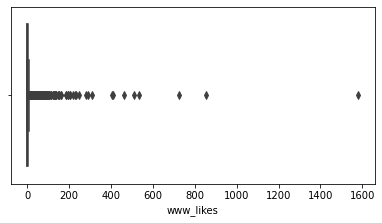

In [158]:


plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
sns.boxplot(df1['dob_year'])  
plt.show()


plt.figure(figsize=(12,8))
plt.subplot(4,2,1)
sns.boxplot(df1['friend_count'])
plt.show()


plt.figure(figsize=(12,8))
plt.subplot(4,2,2)
sns.boxplot(df1['dob_day'])
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(4,3,1)
sns.boxplot(df1['likes_received'])
plt.show()


plt.figure(figsize=(12,8))
plt.subplot(4,3,2)
sns.boxplot(df1['dob_month'])
plt.show()




plt.figure(figsize=(15,8))
plt.subplot(4,4,1)
sns.boxplot(df1['age'])
plt.show()

plt.figure(figsize=(30,15))
plt.subplot(4,4,2)
sns.boxplot(df1['www_likes'])
plt.show()

#### INFERENCES : ALL COLUMNS EXcept friend_count , dob_month , dob_day does not contain outliers all the other columns selected contains the outliers present 

In [159]:
print("the skew value of 'dob_year',",df1.dob_year.skew())
print("the skew value of friend_count",df1.friend_count.skew())
print("the skew value of tenure",df1.tenure.skew())
print("the skew value of 'dob_day',",df1.dob_day.skew())
print("the skew value of likes_received",df1.likes_received.skew())
print("the skew value of 'likes_received'",df1.likes_received.skew())
print("the skew value of 'dob_month',",df1.dob_month.skew())
print("the skew value of age",df1.age.skew())
print("the skew value of www_likes",df1.www_likes.skew())

the skew value of 'dob_year', -1.6285741973183634
the skew value of friend_count 0.3393673207205632
the skew value of tenure 2.0835496317796776
the skew value of 'dob_day', 0.24190766041491962
the skew value of likes_received 18.41802118414414
the skew value of 'likes_received' 18.41802118414414
the skew value of 'dob_month', 0.1602823038779257
the skew value of age 1.6285741973183543
the skew value of www_likes 16.9414933800755


##### the columns selected are skewed mainly likes received and www_likes 

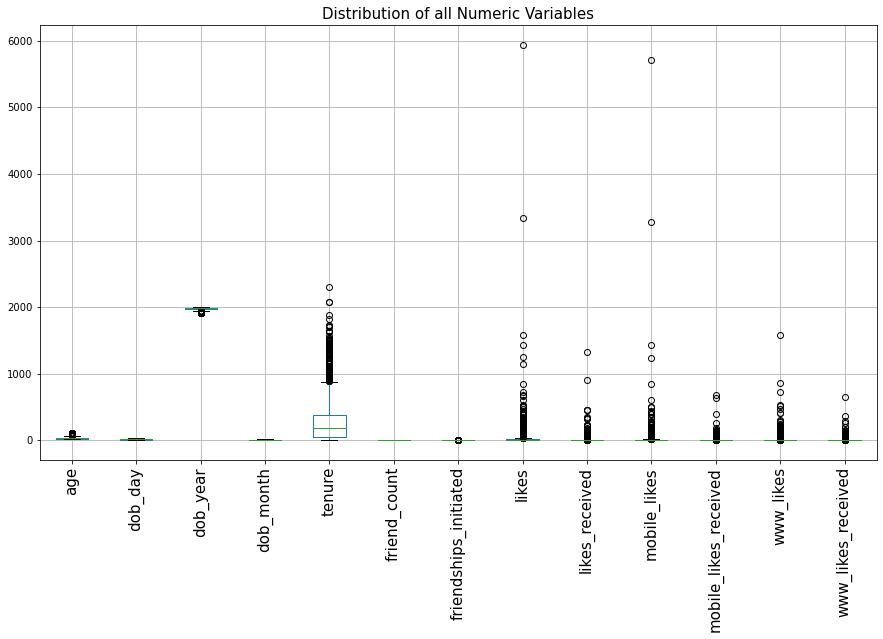

In [208]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df_num1.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- There are outliers present in almost all categories <br>
- We have found count of categories for each feature.<br>
- Checking the null values, it is seen that only around 0.2% of values are missing.<br>

</div>

### OUTLIER TREATMENT

In [293]:

# type your code here

Q1 = df1.quantile(0.25)
Q2 = df1.quantile(0.5)
Q3 = df1.quantile(0.75)


IQR = Q3 - Q1
IQR

dob_year          19.250000
friend_count       2.000000
tenure           333.000000
dob_day           16.250000
likes_received     3.000000
dob_month          7.000000
age               19.250000
www_likes          3.000000
dtype: float64

In [294]:
df = df[~((df < (Q1 - 1.5 *IQR)) | (df > (Q3 + 1.5 *IQR))).any(axis=1)]
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

In [209]:
df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 2104 non-null   int64 
 1   age                    2104 non-null   int64 
 2   dob_day                2104 non-null   int64 
 3   dob_year               2104 non-null   int64 
 4   dob_month              2104 non-null   int64 
 5   gender                 2104 non-null   object
 6   tenure                 2104 non-null   int64 
 7   friend_count           2104 non-null   int64 
 8   friendships_initiated  2104 non-null   int64 
 9   likes                  2104 non-null   int64 
 10  likes_received         2104 non-null   int64 
 11  mobile_likes           2104 non-null   int64 
 12  mobile_likes_received  2104 non-null   int64 
 13  www_likes              2104 non-null   int64 
 14  www_likes_received     2104 non-null   int64 
dtypes: int64(14), object(

In [211]:
df.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [212]:
df.gender = df.gender.fillna("female")

In [213]:
df.gender.value_counts()

male      1400
female     704
Name: gender, dtype: int64

In [214]:
df_num  = df.select_dtypes(np.number)
df_num.head()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,580,0,0,1,0,0,0,1,0


In [215]:
df_cat = df.select_dtypes('O')
df_cat = pd.get_dummies(df_cat, drop_first = True)
df_cat.value_counts()

gender_male
1              1400
0               704
dtype: int64

In [216]:
df_final = pd.concat([df_num, df_cat], axis = 1)
df_final.dtypes

userid                   int64
age                      int64
dob_day                  int64
dob_year                 int64
dob_month                int64
tenure                   int64
friend_count             int64
friendships_initiated    int64
likes                    int64
likes_received           int64
mobile_likes             int64
mobile_likes_received    int64
www_likes                int64
www_likes_received       int64
gender_male              uint8
dtype: object

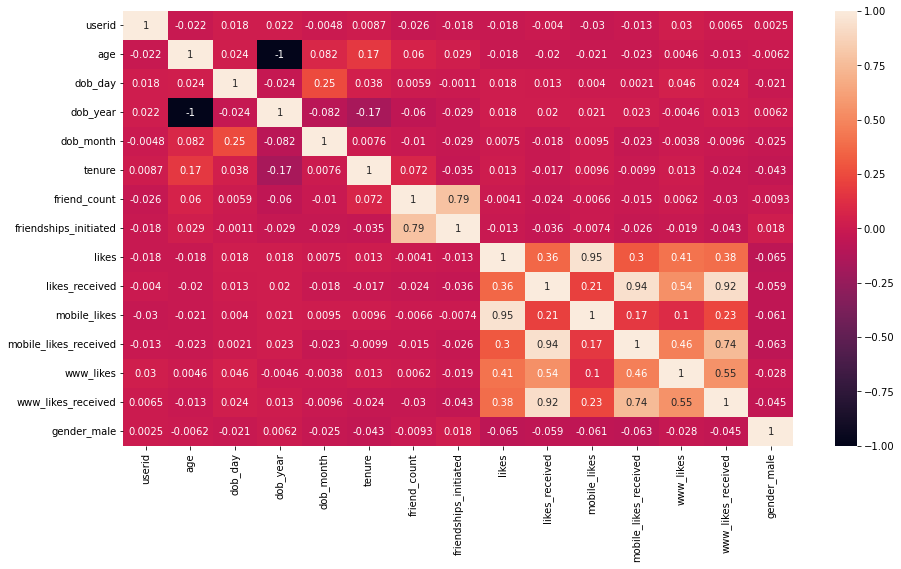

In [217]:
plt.figure(figsize=(15,8))
sns.heatmap(df_final.corr(),annot=True)
plt.show()

In [295]:
#### MISSING VALUES PERCENTAGE

In [218]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df2.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df2.isnull().sum()*100/df2.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
userid,0,0.000000
age,0,0.000000
dob_day,0,0.000000
dob_year,0,0.000000
dob_month,0,0.000000
gender,0,0.000000
tenure,0,0.000000
friend_count,0,0.000000
friendships_initiated,0,0.000000
likes,0,0.000000


In [297]:
df_feature = df_final.drop(['likes','userid'],axis=1)

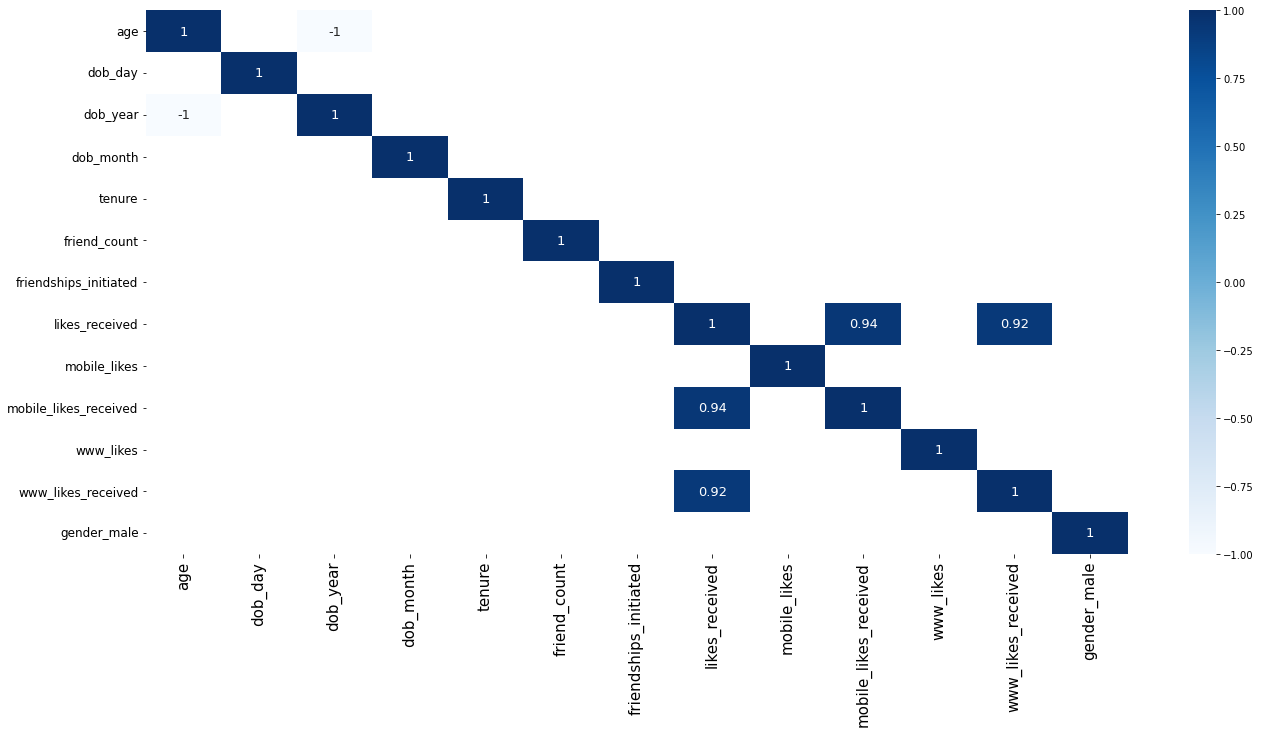

In [298]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (22,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_feature.corr()[np.abs(df_feature.corr()) > 0.8], annot = True, annot_kws = {"size": 13}, cmap = 'Blues')

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 12)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

**Interpretation:** here likes_received and www_likes_received ,mobile_likes_received is showing positive coorelation and the rest doesn't show strong positive or negative coorelation.

In [219]:
df_final = df_final.astype('int64')

In [220]:
df_final.dtypes

userid                   int64
age                      int64
dob_day                  int64
dob_year                 int64
dob_month                int64
tenure                   int64
friend_count             int64
friendships_initiated    int64
likes                    int64
likes_received           int64
mobile_likes             int64
mobile_likes_received    int64
www_likes                int64
www_likes_received       int64
gender_male              int64
dtype: object

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

In [221]:
df_final.dtypes

userid                   int64
age                      int64
dob_day                  int64
dob_year                 int64
dob_month                int64
tenure                   int64
friend_count             int64
friendships_initiated    int64
likes                    int64
likes_received           int64
mobile_likes             int64
mobile_likes_received    int64
www_likes                int64
www_likes_received       int64
gender_male              int64
dtype: object

In [222]:
df_final.head(2)

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
0,1098638,13,2,2000,2,0,0,0,1,0,0,0,1,0,1
1,2063204,14,22,1999,1,104,0,0,1,0,0,0,1,0,1


In [223]:
X = df_final.drop('likes', axis = 1)
y = df_final['likes']

## CATEGORICAL TO  NUMERICAL THROUGH DUMMY ENCODING
### *already done 

In [ ]:
df_cat = df.select_dtypes('O')
df_cat = pd.get_dummies(df_cat, drop_first = True)
df_cat.value_counts()

In [ ]:
encoded = df_final.select_dtypes('O')
X_cat = pd.get_dummies(X_cat, drop_first = True)
X_cat

### SCALING THE DATA 

In [78]:
# SCALING THE DATA 
# scale the independent numeric and target variable
df2\.iloc[:,:] = df2.iloc[:, :].apply(lambda rec: (rec - rec.mean()) / rec.std())

df2_features.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,-1.432218,-1.264433,-1.205837,1.264433,-1.049682,0.708956,-0.923338,-1.460144,-1.169970,-0.157296,-0.177178,-0.113858,-0.158402,-0.167046
1,1.367987,-1.202534,0.958077,1.202534,-1.320037,0.708956,-0.573769,-1.460144,-1.169970,-0.157296,-0.177178,-0.113858,-0.158402,-0.167046
2,-0.035968,-0.893038,0.525294,0.893038,1.113159,-1.409855,-0.210754,-1.460144,-1.169970,-0.157296,-0.177178,-0.113858,-0.158402,-0.167046
3,1.125487,-0.769239,-1.314032,0.769239,-1.320037,0.708956,0.179151,-1.460144,-1.169970,-0.157296,-0.177178,-0.113858,-0.158402,-0.167046
4,-0.717502,-0.645441,-0.340271,0.645441,-1.049682,0.708956,1.026185,-1.460144,-1.169970,-0.157296,-0.177178,-0.113858,-0.158402,-0.167046


In [12]:
df_numerical = df[['userid', 'age', 'dob_day', 'dob_year', 'dob_month','tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received']]
df_numerical.head()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,580,0,0,1,0,0,0,1,0


In [74]:
df2_target = df2['likes']
df2_target.head() 


0    1
1    1
2    1
3    1
4    1
Name: likes, dtype: int64

In [77]:
df2_features = df2.drop('likes', axis = 1)
df2_features.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,1,0,0,0,0,0,0,1,0
1,2063204,14,22,1999,1,1,104,0,0,0,0,0,1,0
2,1579594,19,18,1994,10,0,212,0,0,0,0,0,1,0
3,1979672,21,1,1992,1,1,328,0,0,0,0,0,1,0
4,1344831,23,10,1990,2,1,580,0,0,0,0,0,1,0


In [61]:
df2.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [ ]:
df_cat = df.select_dtypes('O')
df_cat = pd.get_dummies(df_cat, drop_first = True)
df_cat

### SCALING USING STANDARD SCALER

In [225]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

In [226]:
# initialize the standard scalar
scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [230]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X1 = pd.concat([df_num_scaled, df_cat], axis = 1)

# display first five observations
X1.head()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
0,-1.432558,-1.264734,-1.206123,1.264734,-1.049932,-0.923558,-1.460491,-1.170249,-0.157333,-0.177220,-0.113885,-0.158440,-0.167086,-0.173746,1
1,1.368312,-1.202820,0.958305,1.202820,-1.320351,-0.573905,-1.460491,-1.170249,-0.157333,-0.177220,-0.113885,-0.158440,-0.167086,-0.173746,1
2,-0.035976,-0.893250,0.525419,0.893250,1.113424,-0.210804,-1.460491,-1.170249,-0.157333,-0.177220,-0.113885,-0.158440,-0.167086,-0.173746,0
3,1.125755,-0.769422,-1.314345,0.769422,-1.320351,0.179194,-1.460491,-1.170249,-0.157333,-0.177220,-0.113885,-0.158440,-0.167086,-0.173746,1
4,-0.717672,-0.645594,-0.340352,0.645594,-1.049932,1.026429,-1.460491,-1.170249,-0.157333,-0.177220,-0.113885,-0.158440,-0.167086,-0.173746,1


### TRAIN TEST SPLIT

In [ ]:
# import train-test split 
from sklearn.model_selection import train_test_split


In [231]:
X = X1.drop(['likes'],axis=1)
y = X1['likes']

In [232]:
# split the independent and target variable into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X,y,random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train_slr', X_train_slr.shape)
print('y_train_slr', y_train_slr.shape)

# print dimension of test set
print('X_test_slr', X_test_slr.shape)
print('y_test_slr', y_test_slr.shape)

X_train_slr (1472, 14)
y_train_slr (1472,)
X_test_slr (632, 14)
y_test_slr (632,)


<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



In [233]:
X = df_final.drop(['likes'],axis=1)
y = df_final['likes']

In [236]:
X.dtypes

userid                   int64
age                      int64
dob_day                  int64
dob_year                 int64
dob_month                int64
tenure                   int64
friend_count             int64
friendships_initiated    int64
likes_received           int64
mobile_likes             int64
mobile_likes_received    int64
www_likes                int64
www_likes_received       int64
gender_male              int64
dtype: object

In [237]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = X.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = y.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (1472, 15)
y_train_full (1472,)
X_test_full (632, 15)
y_test_full (632,)


In [93]:
# The above heatmap, show the variables having a strong positive/negative correlation. The variables with dark shade represent the strong positive correlation.

In [238]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.071e+31
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:02:01   Log-Likelihood:                 40659.
No. Observations:                1472   AIC:                        -8.129e+04
Df Residuals:                    1459   BIC:                        -8.122e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.388e-

**Interpretation:** The model with the interaction variable explains a 96.3% variation in the target variable. Thus, adding the interaction effect to the model with significant variabels increased the R-squared from 0.962 to 0.963.

The `Durbin-Watson` test is used to check the autocorrelation between the residuals = 1.986 ie no autocorrelation

The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

The 'Cond. No' (1.06e+22) represents the `Condition Number (CN)` which is used to check the multicollinearity. 
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data.

In [239]:
# For training set:
# train_pred: Prediction made by the model on the training dataset 'X_train'
# y_train: Actual values of the target variable for the train dataset

# For testing set:
# test_pred: Prediction made by the model on the test dataset 'y_train'
# y_test: Actual values of the target variable for the test dataset

# Predicting the output of the target variable from the train data
# train_pred can also be obtained from "MLR_model_with_significant_var.fittedvalues"
train_pred = MLR_full_model.predict(X_train_full)

# Predicting the output of the target variable from the test data
test_pred = MLR_full_model.predict(X_test_full)


In [241]:
test_pred.head()

1283   48.000000
1409    1.000000
368     1.000000
573     4.000000
1237   19.000000
dtype: float64

In [243]:
train_pred.head()

1427    2.000000
641     6.000000
1219   14.000000
531     3.000000
2040    1.000000
dtype: float64

### Calculating the mse using the "mean_squared_error" function


In [126]:
# Calculating the mse using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train_full, train_pred)
# taking the square root of the mse and then rounding the value upto 4 digits
rmse_train = round(np.sqrt(mse_train), 4)
# printing the rmse for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test_full, test_pred)
# taking the square root of the mse and then rounding the value upto 4 digits
rmse_test = round(np.sqrt(mse_test), 4)
# printing the rmse for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)


Root Mean Squared Error (RMSE) on training set:  0.0
Root Mean Squared Error (RMSE) on test set:  0.0


### R SQUARE SCORE

In [244]:
 from sklearn.metrics import r2_score
    
r2_score(y_train_full, train_pred)

1.0

##from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_

### RFE FEATURE SELECTION

In [247]:
X.shape[1]

14

In [249]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

linreg_forward = sfs(estimator = linreg, k_features = (4,14), forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished

[2022-08-01 17:08:50] Features: 1/14 -- score: 0.7203795273260984[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2022-08-01 17:08:51] Features: 2/14 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2022-08-01 17:08:51] Features: 3/14 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

In [250]:
# print the selected feature names when k_features = (5, 15)
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('userid', 'age', 'mobile_likes', 'www_likes')

R-Squared:  1.0


In [251]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2022-08-01 17:09:27] Features: 1/14 -- score: 0.7203795273260984[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2022-08-01 17:09:28] Features: 2/14 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-08-01 17:09:28] Features: 3/14 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

In [252]:
# printing the selected feature names when k_features = 'best'
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('mobile_likes', 'www_likes')

R-Squared:  1.0


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

In [277]:
#1.

dep_var=df['likes']
ind_var=df.drop(['userid','likes'],axis=1)
ind_var


,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13,2,2000,2,male,0,0,0,0,0,0,1,0
1,14,22,1999,1,male,104,0,0,0,0,0,1,0
2,19,18,1994,10,female,212,0,0,0,0,0,1,0
3,21,1,1992,1,male,328,0,0,0,0,0,1,0
4,23,10,1990,2,male,580,0,0,0,0,0,1,0
5,23,21,1990,3,female,0,0,0,0,0,0,1,0
6,26,14,1987,2,male,83,0,0,0,0,0,1,0
7,26,11,1987,6,male,106,0,0,0,0,0,1,0
8,28,1,1985,2,male,2,0,0,0,0,0,1,0
9,28,25,1985,3,female,4,0,0,0,0,0,1,0


In [282]:

ind_var.head()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,13,2,2000,2,0,0,0,0,0,0,1,0
1,14,22,1999,1,104,0,0,0,0,0,1,0
2,19,18,1994,10,212,0,0,0,0,0,1,0
3,21,1,1992,1,328,0,0,0,0,0,1,0
4,23,10,1990,2,580,0,0,0,0,0,1,0


In [283]:
len(ind_var.columns)

12

In [284]:

#Step1: Check the optimal number of features between 4 to 30

ind_var.head()
print("The Number of features are ",len(ind_var.columns))

#Step2: RFE with n features(LinearRegression) 
# evaluate RFE for regression
import warnings 
warnings.filterwarnings('ignore')
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
#Step3: Specify the number of features
# define dataset
X=ind_var
y=dep_var
errors={}

# define RFE
for j in range(4,len(ind_var.columns)+1):
    RFE_List=[]
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=j)
    #Step4: Fit with n features
    rfe.fit(X, y)
    
    
    for i in range(X.shape[1]):
        #print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
        if(rfe.support_[i]):
            RFE_List.append(ind_var.columns[i])
    #print(RFE_List) 
    
    #Step5: Select features selected by rfe_n
    X=ind_var[RFE_List]
    
    #Step6: Add a constant to the model
    X = sm.add_constant(X)
    
    #Step7: Fitting the model and test data for n selected columns
    result = sm.OLS(y, X).fit()
    
    #Step8:Predicting the ols model with n features
    ypred = result.predict(X)       
                           
    #Step9: Calculate evaluation metrics
    
    rmse_ = rmse(y, ypred)
    r2=r2_score(y, ypred)
    
    errors['model'+str(j)]=[rmse_,r2]
    #print(r2)

The Number of features are  12


In [285]:
l_rmse=[]
# RMSE Errors are in l_rmse
l_r2=[]
#R2 errors are in l_r2
for i in errors:
    l_rmse.append(errors[i][0])
print("The minimum error RMSE: ",min(l_rmse))   
for i in errors:
    l_r2.append(errors[i][-1])
print('The minimun error R2:', min(l_r2))

The minimum error RMSE:  5.413479332647089e-14
The minimun error R2: 0.0009223205379876864


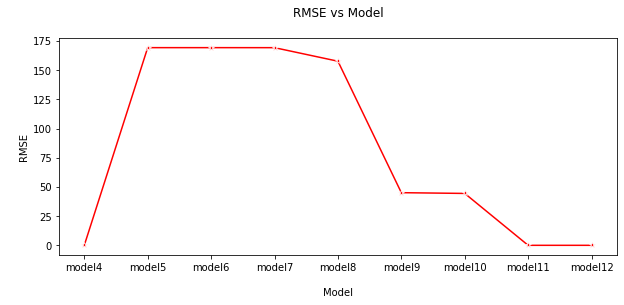

In [286]:
#Step 10: Plot r2 and RMSE against n_features 
## FOR RMSE aganist n_features
l=[]
for i in errors.keys():
    l.append(i)
    

plt.figure(figsize=(10,4))
sns.lineplot(x=l,y=l_rmse,color='r',marker='*')
plt.title('RMSE vs Model\n')
plt.xlabel('\nModel',)
plt.ylabel('\nRMSE')
plt.show()



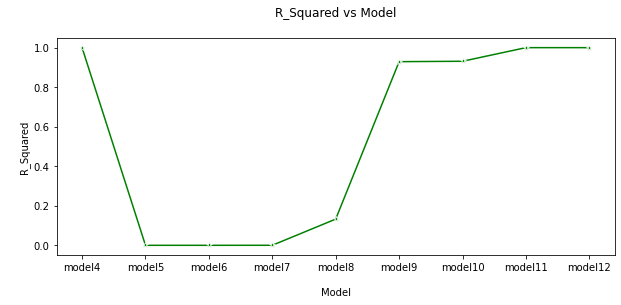

In [287]:

## FOR R2 aganist n_features
plt.figure(figsize=(10,4))
sns.lineplot(x=l,y=l_r2,color='g',marker='*')
plt.title('R_Squared vs Model\n')
plt.xlabel('\nModel',)
plt.ylabel('\nR_Squared')
plt.show()

#### BUILDING A MODEL WITH THE RFE FEATURES

In [255]:
X_rfe = df_final[['userid', 'age', 'mobile_likes', 'www_likes']]


In [256]:
X_rfe = sm.add_constant(X_rfe)
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y_full, random_state=1, test_size = 0.3)

print('X_train_full', X_train_rfe.shape)
print('y_train_full', y_train_rfe.shape)
print('X_test_full', X_test_rfe.shape)
print('y_test_full', y_test_rfe.shape)

X_train_full (1472, 5)
y_train_full (1472,)
X_test_full (632, 5)
y_test_full (632,)


In [257]:
# build a model on training dataset
MLR_full_model = sm.OLS(y_train_rfe, X_train_rfe).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.844e+29
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:15:55   Log-Likelihood:                 35690.
No. Observations:                1472   AIC:                        -7.137e+04
Df Residuals:                    1467   BIC:                        -7.134e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -3.02e-14   9.69e-13     -0.031   

**Interpretation:** 
The `Durbin-Watson` test is used to check the autocorrelation between the residuals =0.091 ie positive  autocorrelation
The 'Cond. No' (8.47e+06) represents the `Condition Number (CN)` which is used to check the multicollinearity. 
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data.

In [259]:
train_pred_rfe = MLR_full_model.predict(X_train_rfe)

# Predicting the output of the target variable from the test data
test_pred_rfe = MLR_full_model.predict(X_test_rfe)


<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

#### ASSUMPTIONS BEFORE MODEL BUIDLING 

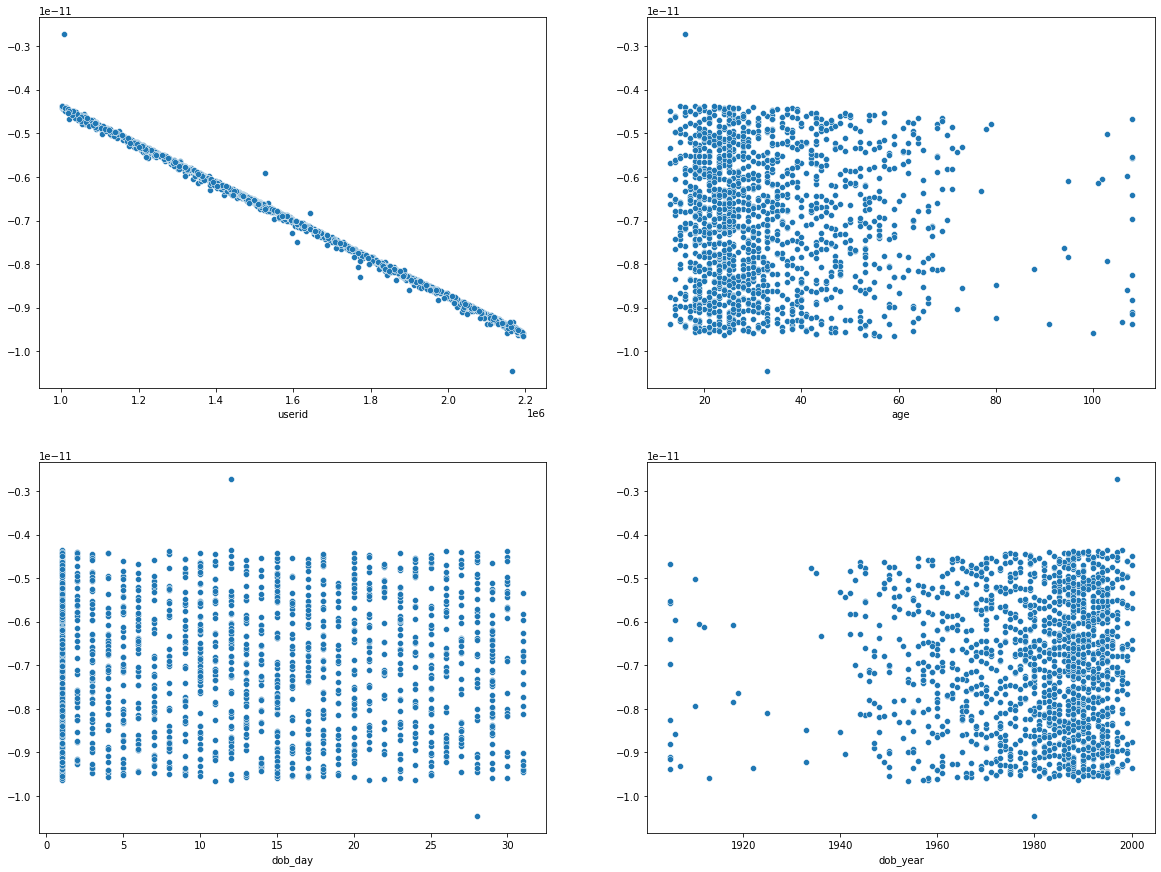

In [261]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_full.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train_full[variable], MLR_full_model.resid , ax=subplot)

# display the plot
plt.show()

**Interpretation:** The above plots show no specific pattern, implies that there is a linearity present in the data.

In [265]:
# print the model summary
# we include all the predictors
# drop(): drops specified column(s)/row(s) from the dataframe
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = df_final.drop(['likes'], axis =1)

# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# set the dependent variable
y = df_final['likes']

# building a model with an intercept
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y,X).fit()

# print the model summary
print(MLR_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.073e+32
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:22:21   Log-Likelihood:                 59482.
No. Observations:                2104   AIC:                        -1.189e+05
Df Residuals:                    2091   BIC:                        -1.189e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.762e-

Skewness of the residuals:  0


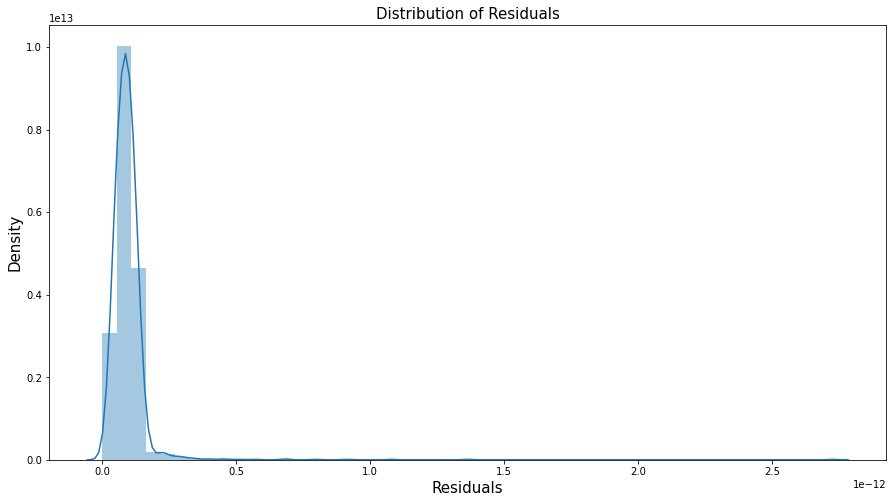

In [321]:
# plot a distplot for the residuals
sns.distplot(MLR_model.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model.resid.skew())

In [322]:
# THE DATA APPEARS TO BE NORMAL DISTRIBUTION 

### Heteroskedasticity

## The test hypothesis for the Breusch-Pagan test is given as:
#### H0 :  There is homoscedasticity present in the data 
#### H1 :  There is a heteroscedasticity present in the data 

In [263]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_full_model.resid, MLR_full_model.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 38285.127008211944), ('p-value', 0.0)]

 ## QQ PLOT

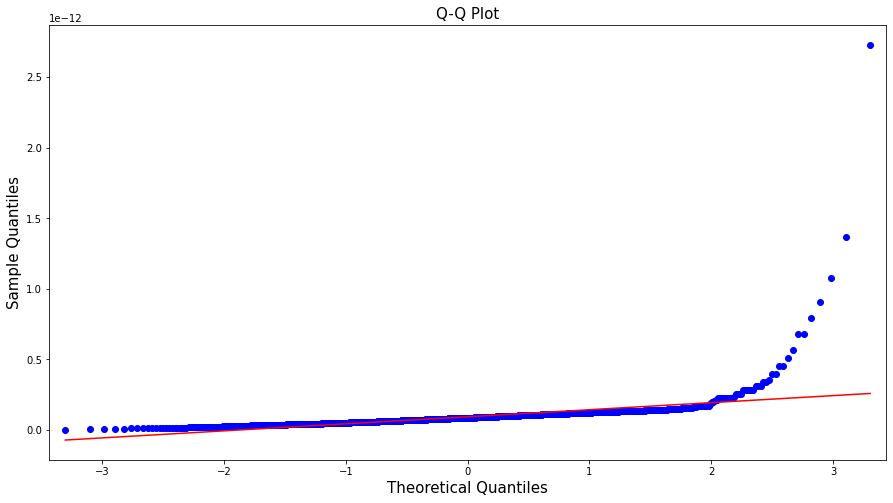

In [266]:

# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are away from the diagonal line, but mostly every pont alings with the regression line hence we conclude that the residuals do follow a `normal distribution`.

### SHAPIRO WILK TEST

In [300]:

# pass the residuals to 'shapiro()'
stat, p_value = shapiro(MLR_full_model.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9604231119155884
P-Value: 1.3969237484218293e-19


**Interpretation:** From the above test we can see that the p-value is 1.3 (greater than 0.05), thus we can say that the residuals are normally distributed.

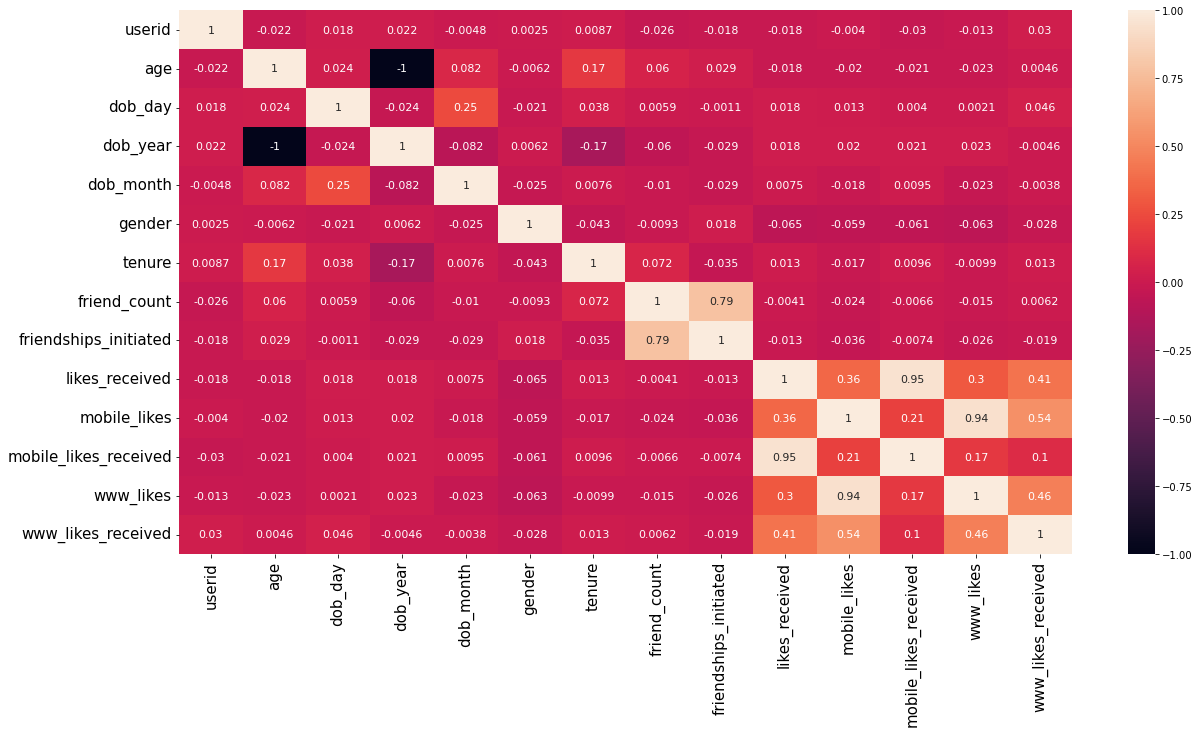

In [302]:

# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: used to set the font size of the annotation
sns.heatmap(df2_features.corr(), annot = True, annot_kws = {"size": 11})

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

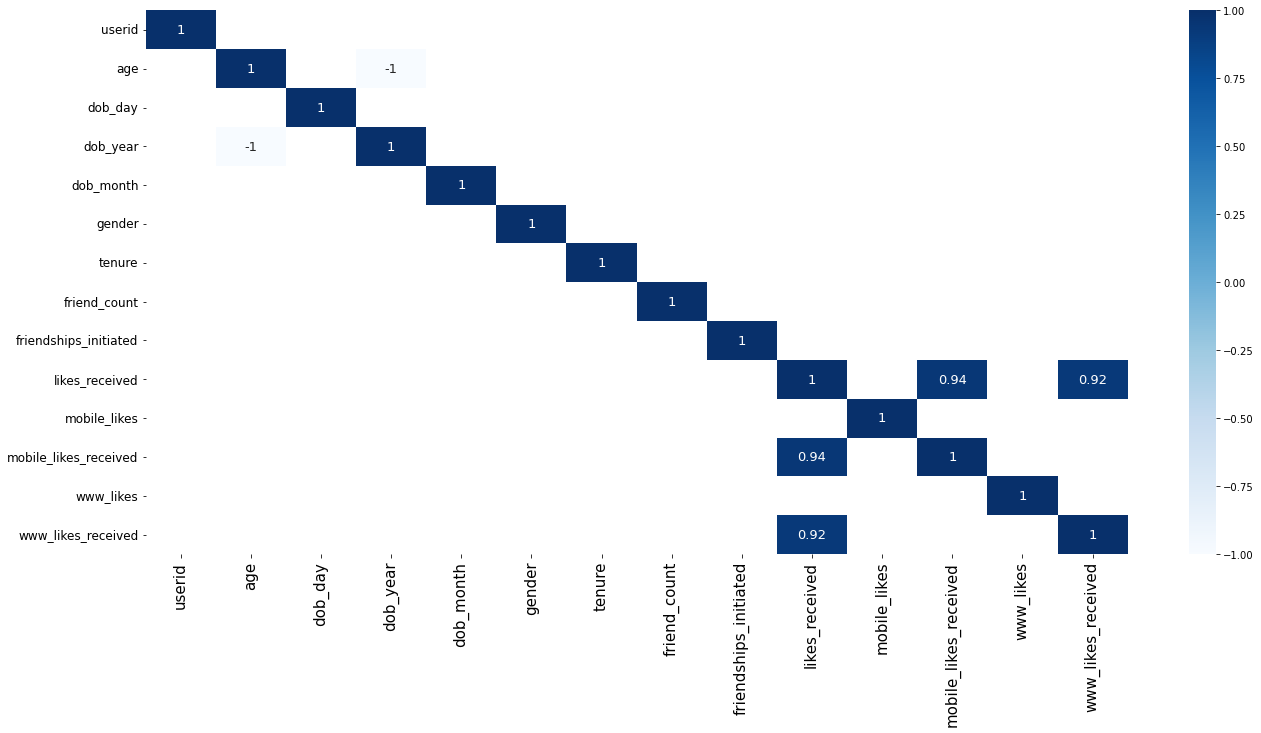

In [301]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (22,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(X.corr()[np.abs(X.corr()) > 0.8], annot = True, annot_kws = {"size": 13}, cmap = 'Blues')

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 12)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

In [138]:
# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

In [139]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df2_features
 
# consider the dependent variable
y = df2_target

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 12)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['userid', 'dob_day', 'dob_year', 'gender', 'tenure', 'friend_count',
       'friendships_initiated', 'likes_received', 'mobile_likes',
       'mobile_likes_received', 'www_likes', 'www_likes_received'],
      dtype='object')


In [140]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train[['userid', 'dob_day', 'dob_year', 'gender', 'tenure', 'friend_count',
       'friendships_initiated', 'likes_received', 'mobile_likes',
       'mobile_likes_received', 'www_likes', 'www_likes_received']]

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(new_X_train, y_train)

# check the score
linreg.score(new_X_train, y_train)

1.0

### K FOLD CROSS VALIDATION

In [309]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [308]:
# n_splits: specify the number of k folds
kf = KFold(n_splits = 5)

In [310]:
# create a function 'get_score' that returns the R-squared score for the training set
# 'get_score' takes 5 input parameters
def get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                                   # fit the model
    return model.score(X_test_k, y_test_k)  

In [315]:
# copy the original dataset
df2_k = df2.copy()

# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df2_k.drop('userid',axis=1)
# consider the dependent variable
y = df2_k['likes']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [318]:
# create an empty list to store the scores
scores = []

for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
   
    # call the function 'get_scores()' and append the scores in the list 'scores'
    scores.append(get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k)) 
    
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", min(scores))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 2))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 2))

All scores:  [1.0, 1.0, 1.0, 1.0, 1.0]

Minimum score obtained:  1.0
Maximum score obtained:  1.0
Average score obtained:  1.0


### K-Fold Cross Validation using `cross_val_score()`

In [319]:
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [320]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [1. 1. 1. 1. 1.]

Minimum score obtained:  1.0
Maximum score obtained:  1.0
Average score obtained:  1.0


In [304]:
l_rmse = [round(i/200,2) for i in l_rmse]

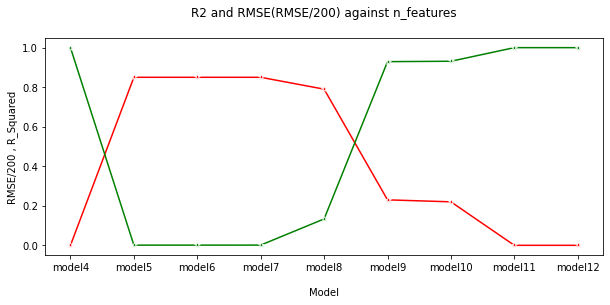

In [305]:
#A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

plt.figure(figsize=(10,4))

sns.lineplot(x=l,y=l_rmse,color='r',marker='*')
sns.lineplot(x=l,y=l_r2,color='g',marker='*',)
plt.xlabel('\nModel')
plt.ylabel('RMSE/200 , R_Squared')
plt.title('R2 and RMSE(RMSE/200) against n_features\n')
plt.show()

In [306]:
#B. Evaluate a logistic regression model using k-fold cross-validation

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
# create dataset
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LinearRegression()
# evaluate model
scorers = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']

results = cross_validate(model, X, y, cv=5, scoring=scorers, return_estimator=True)
results

{'fit_time': array([0.10816383, 0.0037632 , 0.00200009, 0.00200009, 0.00231242]),
 'score_time': array([0.05611944, 0.00199866, 0.00300121, 0.00199986, 0.00218534]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_neg_mean_absolute_error': array([-3.01645750e-13, -3.42008554e-13, -6.61924988e-14, -2.75879609e-13,
        -1.76048065e-13]),
 'test_neg_root_mean_squared_error': array([-3.51688981e-13, -3.92565099e-13, -3.34605827e-13, -3.24660972e-13,
        -2.11365337e-13]),
 'test_r2': array([1., 1., 1., 1., 1.])}